This prediction is for  LCLId = MAC000002
* Using ARIMA
* Using MSTL

In [118]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
import sys
sys.path.append("..")
from db.duckdb.duckdbhelper import DuckDBDatabaseHelper
db = DuckDBDatabaseHelper("../meters.db")

In [120]:
train = pd.read_csv("../model_data/train_day.csv")

In [121]:
train.columns

Index(['day', 'energy_sum', 'temperatureMin', 'temperatureMax', 'uvIndex',
       'dewPoint', 'Type', 'month', 'LCLid', 'Type_Binary'],
      dtype='object')

In [122]:
train

,day,energy_sum,temperatureMin,temperatureMax,uvIndex,dewPoint,Type,month,LCLid,Type_Binary
0,2013-01-03,10.074,9.65,11.41,1.0,9.12,NaN,1,MAC000002,0
1,2013-01-06,10.293,6.91,8.61,1.0,7.00,NaN,1,MAC000002,0
2,2013-01-07,9.439,7.10,9.08,1.0,6.78,NaN,1,MAC000002,0
3,2013-01-11,10.979,0.89,5.70,1.0,1.68,NaN,1,MAC000002,0
4,2013-01-12,10.586,1.75,4.53,1.0,0.79,NaN,1,MAC000002,0
...,...,...,...,...,...,...,...,...,...,...
365,2013-08-26,7.899,16.37,24.32,4.0,13.13,Summer bank holiday,8,MAC000002,1
366,2013-12-25,4.650,3.74,7.19,1.0,2.57,Christmas Day,12,MAC000002,1
367,2013-12-26,4.706,2.87,7.64,0.0,2.86,Boxing Day,12,MAC000002,1
368,2013-01-01,10.800,3.31,7.49,1.0,2.40,New Year?s Day,1,MAC000002,1


In [123]:
df = pd.DataFrame()

df["ds"] = train["day"]
df["y"] = train["energy_sum"]
df["unique_id"] = "Energy"

In [124]:
df.head()

,ds,y,unique_id
0,2013-01-03,10.074,Energy
1,2013-01-06,10.293,Energy
2,2013-01-07,9.439,Energy
3,2013-01-11,10.979,Energy
4,2013-01-12,10.586,Energy


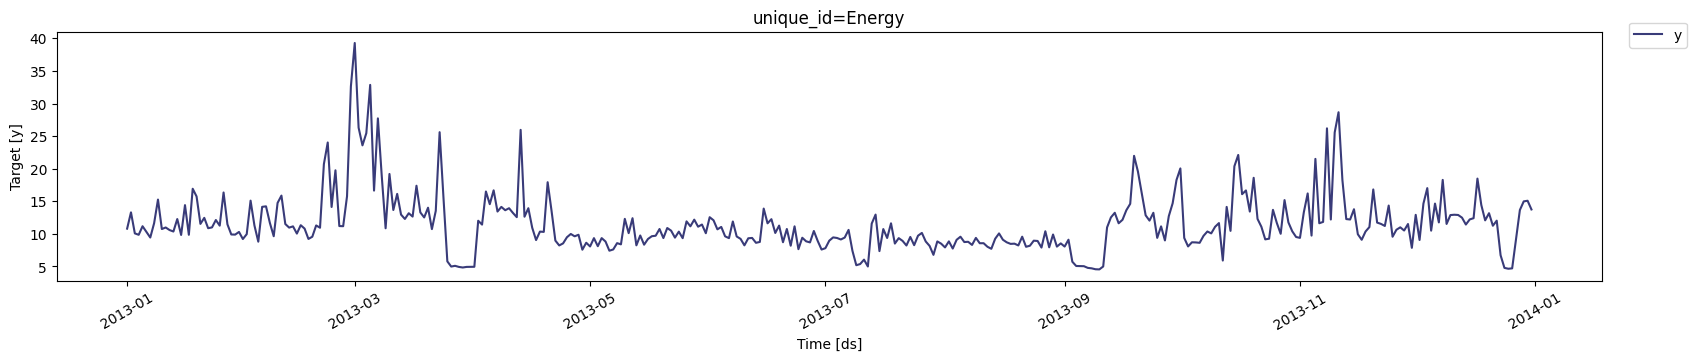

In [125]:
StatsForecast.plot(df)

In [126]:
sf = StatsForecast(
    models=[AutoARIMA()],
    freq='D'
)
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [127]:
forecast_df = sf.predict(h=30, level=[90])
forecast_df.tail()

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
25,Energy,2014-01-26,12.160769,3.945612,20.375926
26,Energy,2014-01-27,12.149359,3.897751,20.400967
27,Energy,2014-01-28,12.233340,3.959277,20.507403
28,Energy,2014-01-29,12.097242,3.784838,20.409645
29,Energy,2014-01-30,12.258304,3.922919,20.593690


In [128]:
forecast_df

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
0,Energy,2014-01-01,12.865082,7.289110,18.441053
1,Energy,2014-01-02,13.091468,6.725282,19.457655
2,Energy,2014-01-03,12.631163,5.855849,19.406478
3,Energy,2014-01-04,12.471272,5.357153,19.585390
4,Energy,2014-01-05,12.622072,5.391830,19.852313
5,Energy,2014-01-06,12.114696,4.698188,19.531204
6,Energy,2014-01-07,12.583099,5.114424,20.051774
7,Energy,2014-01-08,12.025320,4.456501,19.594138
8,Energy,2014-01-09,12.430596,4.815345,20.045848
9,Energy,2014-01-10,12.125363,4.461925,19.788801


### Verify the predictions

In [129]:
sql_query ="""

SELECT day,energy_sum,
LCLid
FROM  meters m 
WHERE date_part('year', day) = 2014
AND  date_part('month', day) = 1
AND LCLid = 'MAC000002'
"""

db.connect()
records = db.fetch_all(sql_query)
db.close_connection()

Connected to DuckDB database: ../meters.db
Fetched 31 rows.
Connection closed.


In [130]:
df_LCLid = pd.DataFrame(records)

In [131]:
df_LCLid.iloc[:,1][:4]

0    15.496
1    14.195
2    11.382
3    16.176
Name: 1, dtype: float64

In [132]:
forecast_df["actual"] = df_LCLid.iloc[:,1]

In [133]:
mae = abs(forecast_df["actual"]-forecast_df["AutoARIMA"]).mean()
print('The MAE is '+str(round(mae,2)))


The MAE is 3.4


In [134]:
from statsforecast import StatsForecast
from statsforecast.models import MSTL, AutoARIMA, SeasonalNaive
from statsforecast.utils import AirPassengers as ap


In [135]:
mstl = MSTL(
    season_length=[1], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)


In [136]:
sf = StatsForecast(
    models=[mstl], # model used to fit each time series 
    freq='D', # frequency of the data
)

In [137]:
sf = sf.fit(df=df)

In [138]:
forecast_df = sf.predict(h=30, level=[90])

In [139]:
forecast_df.head()

,unique_id,ds,MSTL,MSTL-lo-90,MSTL-hi-90
0,Energy,2014-01-01,12.865081,7.289110,18.441053
1,Energy,2014-01-02,13.091468,6.725282,19.457655
2,Energy,2014-01-03,12.631163,5.855848,19.406478
3,Energy,2014-01-04,12.471272,5.357153,19.585391
4,Energy,2014-01-05,12.622072,5.391830,19.852313


In [140]:
forecast_df["actual"] = df_LCLid.iloc[:,1]

In [141]:
mae = abs(forecast_df["actual"]-forecast_df["MSTL"]).mean()
print('The MAE is '+str(round(mae,2)))

The MAE is 3.4
